# Pandas

Pandas是基于Numpy创建的Python库，为Python提供了易于使用的数据结构和数据分析工具。

使用以下语句导入Pandas库：

In [1]:
import pandas as pd

## Pandas数据结构

### Series - 序列

存储任意类型数据的一维数组

In [2]:
s = pd.Series([3, -5, 7, 4], index=["a", "b", "c", "d"])

### DataFrame - 数据帧

In [3]:
data = {
    "Country": ["Belgium", "India", "Brazil"],
    "Capital": ["Brussels", "New Delhi", "Brasília"],
    "Population": [11190846, 1303171035, 207847528],
}

In [4]:
df = pd.DataFrame(data, columns=["Country", "Capital", "Population"])

In [5]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


## 输入/输出

### 读取/写入CSV

In [6]:
df.to_csv("../../_tmp/df_to_csv.csv", index=False)

In [7]:
pd.read_csv("../../_tmp/df_to_csv.csv", nrows=5)

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


### 读取/写入Excel

In [8]:
df.to_excel("../../_tmp/df_to_excel.xlsx", index=False, sheet_name="Sheet1")

In [9]:
pd.read_excel("../../_tmp/df_to_excel.xlsx")

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [10]:
xlsx = pd.ExcelFile("../../_tmp/df_to_excel.xlsx")  # 读取内含多个表的 Excel

In [11]:
df = pd.read_excel(xlsx, "Sheet1")  # 读取多表 Excel 中的 Sheet1 表

In [12]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


## 筛选数据

### 取值

In [39]:
s["b"]  # 取序列的值

-5

In [13]:
df[1:]  # 取数据帧的子集

,Country,Capital,Population
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


### 选取、布尔索引及设置值

**按位置**

In [41]:
df.iloc[[0], [0]]  # 按行与列的位置选择某值

,Country
0,Belgium


In [42]:
df.iat[0, 0]

'Belgium'

**按标签**

In [43]:
df.loc[[0], ["Country"]]  # 按行与列的名称选择某值

,Country
0,Belgium


In [44]:
df.at[0, "Country"]  # 按行与列的名称选择某值

'Belgium'

**按标签/位置**

In [45]:
df.loc[2]  # 选择某行

Country          Brazil
Capital        Brasília
Population    207847528
Name: 2, dtype: object

In [46]:
df.loc[:, "Capital"]  # 选择某列

0     Brussels
1    New Delhi
2     Brasília
Name: Capital, dtype: object

In [47]:
df.loc[1, "Capital"]  # 按行列取值

'New Delhi'

**布尔索引**

In [48]:
s[~(s > 1)]  # 序列 S 中没有大于 1 的值

b   -5
dtype: int64

In [49]:
s[(s < -1) | (s > 2)]  # 序列 S 中小于 -1 或大于 2 的值

a    3
b   -5
c    7
d    4
dtype: int64

In [50]:
df[df["Population"] > 1200000000]  # 选择数据帧中 Population 大于 12 亿的数据

,Country,Capital,Population
1,India,New Delhi,1303171035


In [51]:
df.loc[
    df["Population"] > 1200000000, ["Country", "Capital"]
]  # 选择数据帧中人口大于 12 亿的数据 'Country' 和 'Capital' 字段

,Country,Capital
1,India,New Delhi


**设置值**

In [52]:
s["a"] = 6  # 将序列 s 中索引为 a 的值设为 6

## 删除数据

**通过drop函数删除数据**

In [53]:
s.drop(["a", "c"])  # 按索引删除序列的值 (axis=0)

b   -5
d    4
dtype: int64

In [54]:
df.drop("Country", axis=1)  # 按列名删除数据帧的列 (axis=1)

,Capital,Population
0,Brussels,11190846
1,New Delhi,1303171035
2,Brasília,207847528


## 排序和排名

**根据索引或者值进行排序**

In [55]:
df.sort_index()  # 按索引排序

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [56]:
df.sort_values(by="Country")  # 按某列的值排序

,Country,Capital,Population
0,Belgium,Brussels,11190846
2,Brazil,Brasília,207847528
1,India,New Delhi,1303171035


In [57]:
df.rank()  # 数据帧排名

,Country,Capital,Population
0,1.0,2.0,1.0
1,3.0,3.0,3.0
2,2.0,1.0,2.0


## 查询信息与计算

### 基本信息

In [58]:
df.shape  # (行,列)

(3, 3)

In [59]:
df.index  # 获取索引

RangeIndex(start=0, stop=3, step=1)

In [60]:
df.columns  # 获取列名

Index(['Country', 'Capital', 'Population'], dtype='object')

In [61]:
df.info()  # 获取数据帧基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     3 non-null      object
 1   Capital     3 non-null      object
 2   Population  3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [62]:
df.count()  # 非 Na 值的数量

Country       3
Capital       3
Population    3
dtype: int64

### 汇总

In [63]:
df.sum()  # 合计

Country              BelgiumIndiaBrazil
Capital       BrusselsNew DelhiBrasília
Population                   1522209409
dtype: object

In [64]:
df.cumsum()  # 累计

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,BelgiumIndia,BrusselsNew Delhi,1314361881
2,BelgiumIndiaBrazil,BrusselsNew DelhiBrasília,1522209409


In [65]:
df["Population"].min() / df["Population"].max()  # 最小值除以最大值

0.008587396204673933

In [66]:
df["Population"].idxmin() / df["Population"].idxmax()  # 索引最小值除以索引最大值

0.0

In [67]:
df.describe()  # 基础统计数据

,Population
count,3.000000e+00
mean,5.074031e+08
std,6.961346e+08
min,1.119085e+07
25%,1.095192e+08
50%,2.078475e+08
75%,7.555093e+08
max,1.303171e+09


In [68]:
df["Population"].mean()  # 平均值

C:\Users\yanta\AppData\Local\Temp\ipykernel_42536\1467810487.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()   #平均值


Population    5.074031e+08
dtype: float64

In [69]:
df["Population"].median()  # 中位数

C:\Users\yanta\AppData\Local\Temp\ipykernel_42536\2005239709.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()   #中位数


Population    207847528.0
dtype: float64

## 应用函数

**通过apply函数应用变换**

In [70]:
f = lambda x: x * 2  # 应用匿名函数 lambda

In [71]:
df.apply(f)  # 应用函数

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


In [72]:
df.applymap(f)  # 对每个单元格应用函数

,Country,Capital,Population
0,BelgiumBelgium,BrusselsBrussels,22381692
1,IndiaIndia,New DelhiNew Delhi,2606342070
2,BrazilBrazil,BrasíliaBrasília,415695056


## 数据对齐

### 内部数据对齐

**如有不一致的索引，则使用NA值：**

In [73]:
s3 = pd.Series([7, -2, 3], index=["a", "c", "d"])

In [74]:
s + s3

a    13.0
b     NaN
c     5.0
d     7.0
dtype: float64

### 使用 Fill 方法运算

**还可以使用 Fill 方法****补齐缺失后再****运算：**

In [75]:
s.add(s3, fill_value=0)

a    13.0
b    -5.0
c     5.0
d     7.0
dtype: float64

In [76]:
s.sub(s3, fill_value=2)

a   -1.0
b   -7.0
c    9.0
d    1.0
dtype: float64

In [77]:
s.div(s3, fill_value=4)

a    0.857143
b   -1.250000
c   -3.500000
d    1.333333
dtype: float64

In [78]:
s.mul(s3, fill_value=3)

a    42.0
b   -15.0
c   -14.0
d    12.0
dtype: float64

## 数据重塑

In [1]:
import pandas as pd

df2 = pd.DataFrame(
    {
        "Date": [
            "2021-12-25",
            "2021-12-26",
            "2021-12-25",
            "2021-12-27",
            "2021-12-26",
            "2021-12-27",
        ],
        "Type": ["a", "b", "c", "a", "a", "c"],
        "Value": [1.34, 10.2, 20.43, 50.31, 0.26, 20.64],
    }
)

### 透视

In [2]:
df3 = df2.pivot(index="Date", columns="Type", values="Value")  # 将行变为列
df3

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


### 透视表

In [3]:
df4 = pd.pivot_table(df2, values="Value", index="Date", columns="Type")  # 将行变为列
df4

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


### 堆叠（轴旋转）

In [4]:
stacked = df2.stack()  # 透视列标签
stacked

0  Date     2021-12-25
   Type              a
   Value          1.34
1  Date     2021-12-26
   Type              b
   Value          10.2
2  Date     2021-12-25
   Type              c
   Value         20.43
3  Date     2021-12-27
   Type              a
   Value         50.31
4  Date     2021-12-26
   Type              a
   Value          0.26
5  Date     2021-12-27
   Type              c
   Value         20.64
dtype: object

In [5]:
stacked.unstack()  # 透视索引标签

,Date,Type,Value
0,2021-12-25,a,1.34
1,2021-12-26,b,10.2
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


### 融合/Melt

In [6]:
pd.melt(
    df2, id_vars=["Date"], value_vars=["Type", "Value"], value_name="Observations"
)  # 将列转为行

,Date,variable,Observations
0,2021-12-25,Type,a
1,2021-12-26,Type,b
2,2021-12-25,Type,c
3,2021-12-27,Type,a
4,2021-12-26,Type,a
5,2021-12-27,Type,c
6,2021-12-25,Value,1.34
7,2021-12-26,Value,10.2
8,2021-12-25,Value,20.43
9,2021-12-27,Value,50.31


## 迭代

**迭代遍历数据帧**

In [7]:
df2.items()  # (列索引, 序列) 键值对

<generator object DataFrame.iteritems at 0x00000129D10ECAC0>

In [8]:
df2.iterrows()  # (行索引, 序列) 键值对

<generator object DataFrame.iterrows at 0x00000129D10ECDD0>

## 高级索引

  **基础选择**

In [9]:
df3.loc[:, (df3 > 1).any()]  # 选择任一值大于 1 的列

Type,a,b,c
Date,,,
2021-12-25,1.34,NaN,20.43
2021-12-26,0.26,10.2,NaN
2021-12-27,50.31,NaN,20.64


In [10]:
df3.loc[:, (df3 > 1).all()]  # 选择所有值大于 1 的列

Type
Date
2021-12-25
2021-12-26
2021-12-27


In [11]:
df3.loc[:, df3.isnull().any()]  # 选择含 NaN 值的列

Type,b,c
Date,,
2021-12-25,NaN,20.43
2021-12-26,10.2,NaN
2021-12-27,NaN,20.64


In [12]:
df3.loc[:, df3.notnull().all()]  # 选择不含 NaN 值的列

Type,a
Date,
2021-12-25,1.34
2021-12-26,0.26
2021-12-27,50.31


  **通过isin选择**

In [13]:
df2[(df2.Type.isin(["b", "c"]))]  # 选择指定列为某一类型的数值

,Date,Type,Value
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
5,2021-12-27,c,20.64


In [14]:
df3.filter(items=["a", "b"])  # 选择特定值

Type,a,b
Date,,
2021-12-25,1.34,NaN
2021-12-26,0.26,10.2
2021-12-27,50.31,NaN


  **通过where选择**

In [15]:
s = pd.Series([-1, 3, -5, 7, 4])
s.where(s > 0)  # 选择子集

0    NaN
1    3.0
2    NaN
3    7.0
4    4.0
dtype: float64

  **通过query选择**

In [16]:
df2.query("Value > 10")  # 查询 DataFrame

,Date,Type,Value
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
5,2021-12-27,c,20.64


### 设置/取消索引

In [17]:
df2.set_index("Date")  # 设置索引

,Type,Value
Date,,
2021-12-25,a,1.34
2021-12-26,b,10.20
2021-12-25,c,20.43
2021-12-27,a,50.31
2021-12-26,a,0.26
2021-12-27,c,20.64


In [18]:
df2.reset_index()  # 重置索引 0 ~ n

,index,Date,Type,Value
0,0,2021-12-25,a,1.34
1,1,2021-12-26,b,10.20
2,2,2021-12-25,c,20.43
3,3,2021-12-27,a,50.31
4,4,2021-12-26,a,0.26
5,5,2021-12-27,c,20.64


In [19]:
df2.rename(
    index=str, columns={"Date": "Time", "Type": "Category", "Value": "Number"}
)  # 重命名 DataFrame 列名

,Time,Category,Number
0,2021-12-25,a,1.34
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


### 重设索引

In [20]:
s

0   -1
1    3
2   -5
3    7
4    4
dtype: int64

In [21]:
s2 = s.reindex([1, 3, 0, 2, 4])
s2

1    3
3    7
0   -1
2   -5
4    4
dtype: int64

**前向填充**

In [22]:
import numpy as np

s = pd.Series(range(0, 6), index=range(1, 7))
s.reindex([2, 5, 6, 9, 10, 3])

2     1.0
5     4.0
6     5.0
9     NaN
10    NaN
3     2.0
dtype: float64

In [23]:
s.reindex([2, 5, 6, 9, 10, 3], method="ffill")

2     1
5     4
6     5
9     5
10    5
3     2
dtype: int64

**后向填充**

In [24]:
s.reindex([2, 5, 6, 9, 10, 3], method="bfill")

2     1.0
5     4.0
6     5.0
9     NaN
10    NaN
3     2.0
dtype: float64

### 多重索引

In [25]:
arrays = [np.array([1, 2, 3]), np.array([5, 4, 3])]

In [26]:
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays)

In [27]:
tuples = list(zip(*arrays))

In [28]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [29]:
df6 = pd.DataFrame(np.random.rand(3, 2), index=index)

In [30]:
df2.set_index(["Date", "Type"])

,,Value
Date,Type,
2021-12-25,a,1.34
2021-12-26,b,10.20
2021-12-25,c,20.43
2021-12-27,a,50.31
2021-12-26,a,0.26
2021-12-27,c,20.64


## 数据滤重

**数据帧自带一系列函数对数据重复值进行处理**

In [31]:
s3 = pd.Series([1, 3, 5, 2, 1, 3, 3])
s3.unique()  # 返回唯一值

array([1, 3, 5, 2], dtype=int64)

In [32]:
df2.duplicated("Type")  # 查找重复值

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [33]:
df2.drop_duplicates("Type", keep="last")  # 去除重复值

,Date,Type,Value
1,2021-12-26,b,10.20
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


In [34]:
df2.index.duplicated()  # 查找重复索引

array([False, False, False, False, False, False])

## 数据分组

**分组聚合**

In [35]:
df2.groupby(by=["Date", "Type"]).mean()  # 分组求均值

Value
Date       Type       
2021-12-25 a      1.34
           c     20.43
2021-12-26 a      0.26
           b     10.20
2021-12-27 a     50.31
           c     20.64

In [36]:
df4.groupby(level=0).sum()

Type,a,b,c
Date,,,
2021-12-25,1.34,0.0,20.43
2021-12-26,0.26,10.2,0.00
2021-12-27,50.31,0.0,20.64


In [37]:
df4.groupby(level=0).agg({"a": lambda x: sum(x) / len(x), "b": np.sum})

Type,a,b
Date,,
2021-12-25,1.34,0.0
2021-12-26,0.26,10.2
2021-12-27,50.31,0.0


**转换**

In [38]:
customSum = lambda x: (x + x % 2)

In [39]:
df4.groupby(level=0).transform(customSum)

Type,a,b,c
Date,,,
2021-12-25,2.68,NaN,20.86
2021-12-26,0.52,10.4,NaN
2021-12-27,50.62,NaN,21.28


## 缺失值

In [40]:
df2.dropna()  # 去除缺失值 NaN

,Date,Type,Value
0,2021-12-25,a,1.34
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,a,50.31
4,2021-12-26,a,0.26
5,2021-12-27,c,20.64


In [41]:
df3.fillna(df3.mean())  # 用预设值填充缺失值 NaN

Type,a,b,c
Date,,,
2021-12-25,1.34,10.2,20.430
2021-12-26,0.26,10.2,20.535
2021-12-27,50.31,10.2,20.640


In [42]:
df2.replace("a", "f")  # 用一个值替换另一个值

,Date,Type,Value
0,2021-12-25,f,1.34
1,2021-12-26,b,10.20
2,2021-12-25,c,20.43
3,2021-12-27,f,50.31
4,2021-12-26,f,0.26
5,2021-12-27,c,20.64


## 合并数据

### 合并-Merge

In [43]:
data1 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
data1

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [44]:
data2 = pd.DataFrame(
    {
        "key": ["K0", "K1", "K3", "K4"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
data2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K3,C2,D2
3,K4,C3,D3


In [45]:
pd.merge(data1, data2, how="left", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C2,D2


In [46]:
pd.merge(data1, data2, how="right", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C2,D2
3,K4,NaN,NaN,C3,D3


In [47]:
pd.merge(data1, data2, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K3,A3,B3,C2,D2


In [48]:
pd.merge(data1, data2, how="outer", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,C2,D2
4,K4,NaN,NaN,C3,D3


### 连接-Join

In [49]:
data1.join(data2, how="right", lsuffix="_1", rsuffix="_2")

,key_1,A,B,key_2,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K3,C2,D2
3,K3,A3,B3,K4,C3,D3


### 拼接-Concatenate

**横向/纵向**

In [51]:
pd.concat([s, s2], axis=1, keys=["One", "Two"])

,One,Two
1,0.0,3.0
2,1.0,-5.0
3,2.0,7.0
4,3.0,4.0
5,4.0,NaN
6,5.0,NaN
0,NaN,-1.0


In [52]:
pd.concat([data1, data2], axis=1, join="inner")

,key,A,B,key,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K3,C2,D2
3,K3,A3,B3,K4,C3,D3


## 日期转换

**pandas包含对时间型数据变换与处理的函数**

In [53]:
df2["Date"] = pd.to_datetime(df2["Date"])

In [54]:
df2["Date"] = pd.date_range("2021-12-25", periods=6, freq="M")

In [55]:
import datetime

dates = [datetime.date(2021, 12, 25), datetime.date(2021, 12, 26)]

In [56]:
index = pd.DatetimeIndex(dates)

In [57]:
index = pd.date_range(
    datetime.date(2021, 12, 25), end=datetime.date(2022, 12, 26), freq="BM"
)

In [58]:
index

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', freq='BM')

## 可视化

**Series和Dataframe都自带plot绘图功能**

<Axes: >

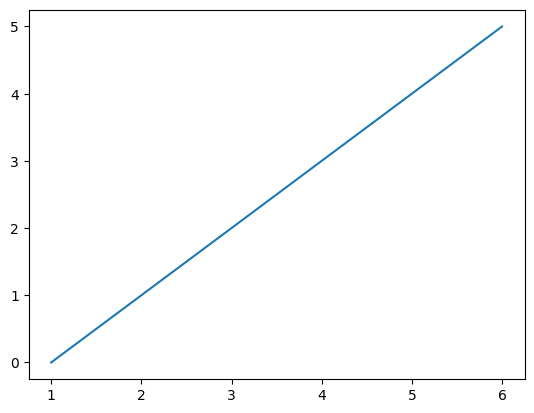

In [60]:
import matplotlib.pyplot as plt

s.plot()

<Axes: >

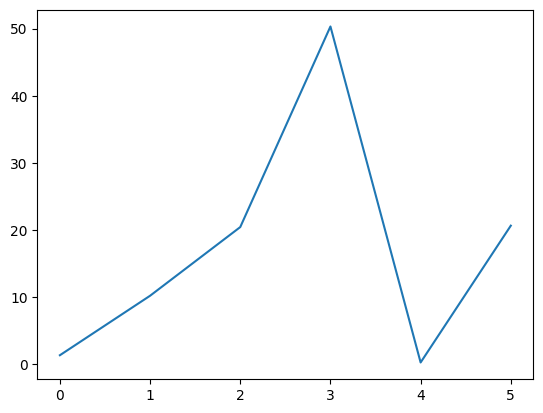

In [61]:
df2["Value"].plot()